# Data Exploration - Iris Dataset
In this notebook we perform basic data exploration on the Iris data set:

https://en.wikipedia.org/wiki/Iris_flower_data_set

First, we load the libraries we need for the analysis.

In [1]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

# import the dataset library
from sklearn import datasets

Let's load the Iris dataset

In [2]:
dataset = datasets.load_iris()

In [3]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# create data with input values
iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# create target variable
iris["Species"] = dataset.target_names[dataset.target]

In [8]:
target_variable = 'Species'
input_variables = iris.columns[iris.columns!=target_variable]

Let's get some statistics for continuous attributes

In [9]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


And some statistics about the class attribute Species. We can use barplot to show the number of instances belonging to each class. As we can see, the dataset is completely balanced with 50 cases for each class.

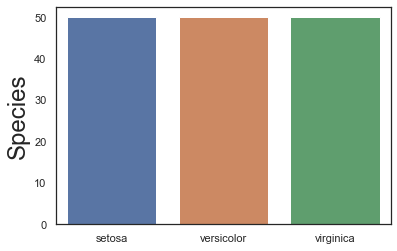

In [11]:
sns.barplot(x=iris[target_variable].unique(),y=iris[target_variable].value_counts().sort_index());

We can use barplots also to plot summary statistics for each class value. For example, we can plot compute the mean values of each attribute.

<Figure size 864x648 with 0 Axes>

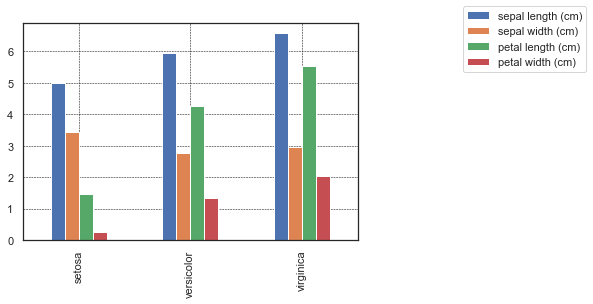

In [26]:
plt.figure(figsize=(12, 9));
iris_gb=iris.groupby([target_variable]).mean();
iris_gb.plot(kind="bar");
plt.grid(color='black', linestyle='--', linewidth=.5);
plt.yticks(np.arange(0, 7, step=1.0));
plt.xlabel("");
plt.legend(loc='upper right',bbox_to_anchor=(1.7, 1.1));

Let's plot the distribution of SepalLengthCm 

In [29]:
from scipy.stats import iqr

numerical_variables = iris.columns[iris.columns!='Species']

print('Variable Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,np.max(iris[c]) - np.min(iris[c])))

print('\n\nInterquartile Range')
for c in numerical_variables:
    print('%s\t%.3f'%(c,iqr(iris[c])))


Variable Range
sepal length (cm)	3.600
sepal width (cm)	2.400
petal length (cm)	5.900
petal width (cm)	2.400


Interquartile Range
sepal length (cm)	1.300
sepal width (cm)	0.500
petal length (cm)	3.500
petal width (cm)	1.500


We can compute correlations among attributes.

(4.5, -0.5)

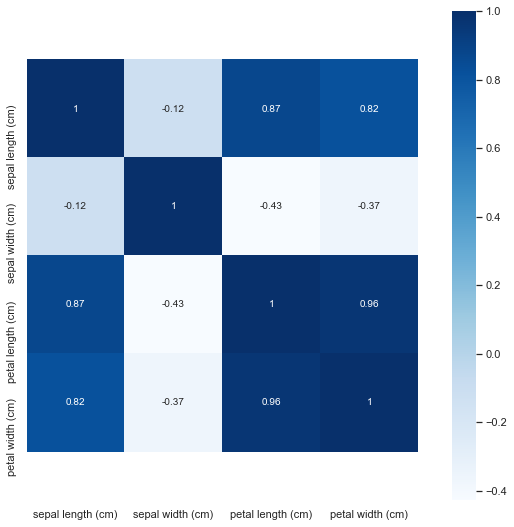

In [30]:
corrmat = iris.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, square=True, cmap="Blues",annot=True);

# these lines are here only to correct a matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
#



We can further analyze the relations among variables by using clustermaps on the correlation matrix

<Figure size 576x432 with 0 Axes>

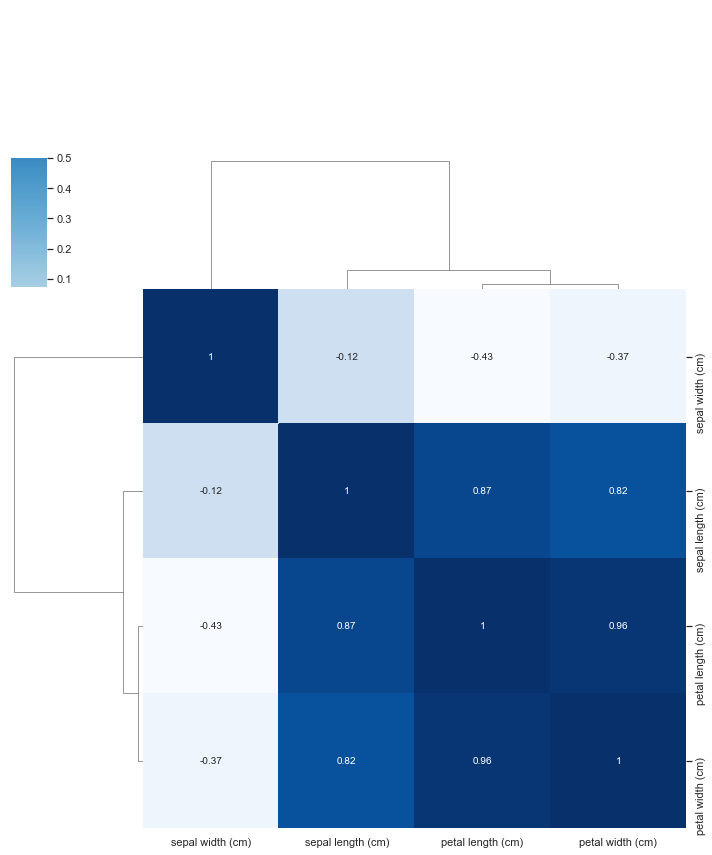

In [31]:
plt.figure(figsize=(8,6))
sns.clustermap(iris.corr(), square=True, annot=True, cmap="Blues");
# these lines are here only to correct a matplotlib bug
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values
#


Or over the original dataset

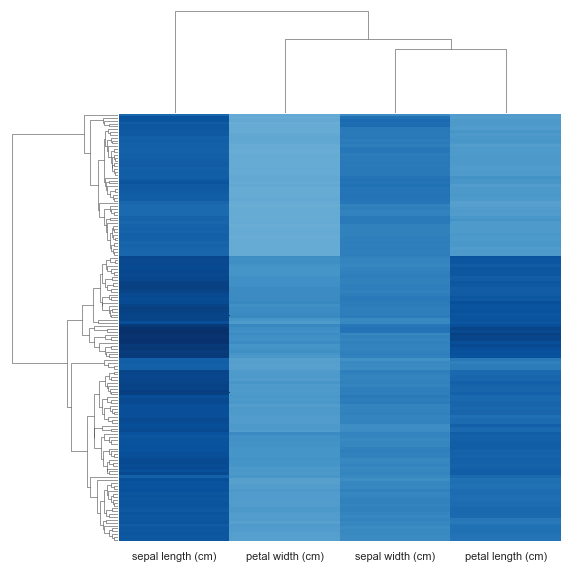

In [39]:
cm = sns.clustermap(iris[numerical_variables], center=0, cmap="Blues", figsize=(8, 8),yticklabels=False)
cm.cax.set_visible(False)

We check how features vary with each data input. The plot shows a sorting in the input values. 

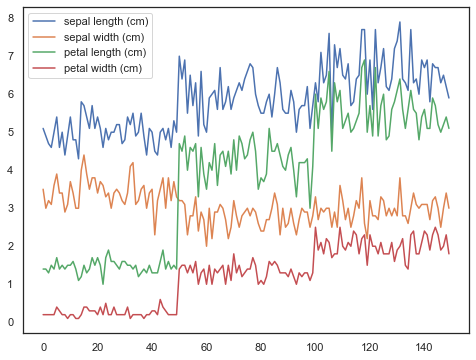

In [40]:
plt.figure(figsize=(8,6))
for feature in iris.columns[0:4]:
    plt.plot(iris[feature], label = feature)
plt.legend(loc='best');

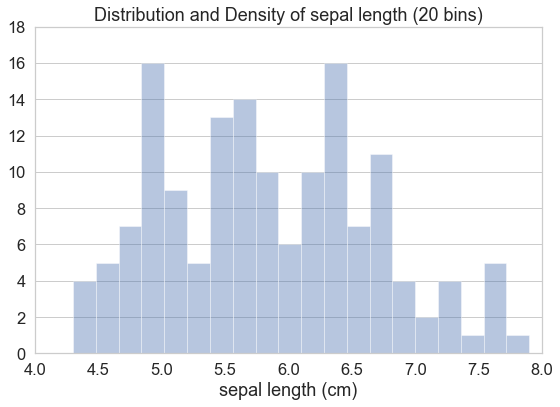

In [45]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['sepal length (cm)'],kde=False,bins=20)
dp.set_title('Distribution and Density of sepal length (20 bins)');
plt.tight_layout();
plt.grid(axis='x')
plt.xlim([4,8])
plt.yticks(np.arange(0, 20, step=2.0));

We can add the kernel density estimator to the plot, although it might not provide reliable information.

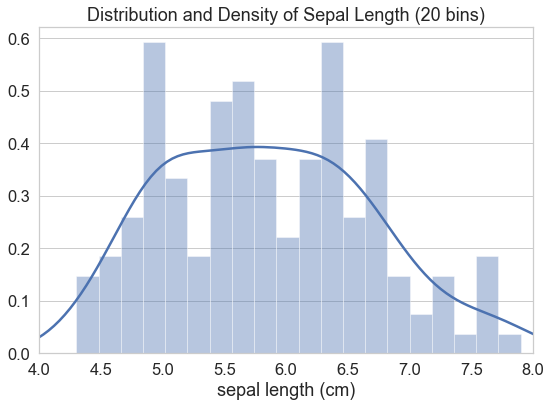

In [46]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['sepal length (cm)'],bins=20)
dp.set_title('Distribution and Density of Sepal Length (20 bins)');
plt.grid(axis='x')
plt.xlim([4,8])
plt.tight_layout();

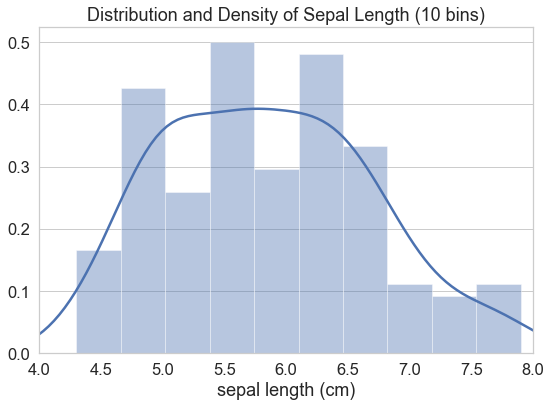

In [47]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(iris['sepal length (cm)'],bins=10)
dp.set_title('Distribution and Density of Sepal Length (10 bins)');
plt.grid(axis='x')
plt.xlim([4,8])
plt.tight_layout();

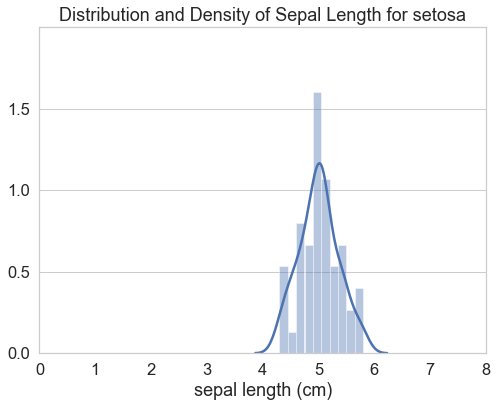

In [48]:
plt.figure(figsize=(8, 6))
iris_is = iris[iris['Species'] == 'setosa']
hist1 = sns.distplot(iris_is['sepal length (cm)'],bins=10)
hist1.set_title('Distribution and Density of Sepal Length for setosa');
plt.xlim([0,8])
plt.ylim([0,2])
plt.yticks(np.arange(0,2,0.5))
plt.grid(axis='x')

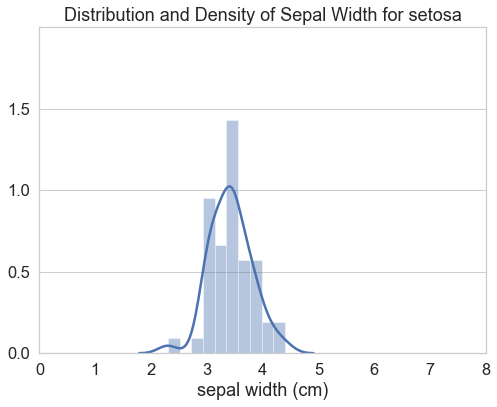

In [49]:
plt.figure(figsize=(8, 6))
iris_is = iris[iris['Species'] == 'setosa']
hist2 = sns.distplot(iris_is['sepal width (cm)'],bins=10)
hist2.set_title('Distribution and Density of Sepal Width for setosa');
plt.xlim([0,8])
plt.ylim([0,2])
plt.yticks(np.arange(0,2,0.5))
plt.grid(axis='x')

We can plot the distribution for each class.

<Figure size 576x432 with 0 Axes>

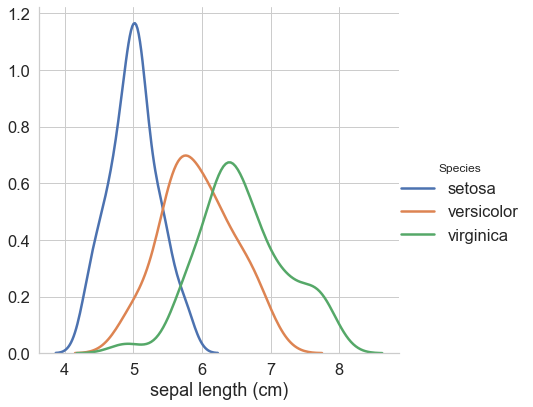

In [51]:
plt.figure(figsize=(8, 6))
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "sepal length (cm)") \
   .add_legend();

And now we use scatter plots.

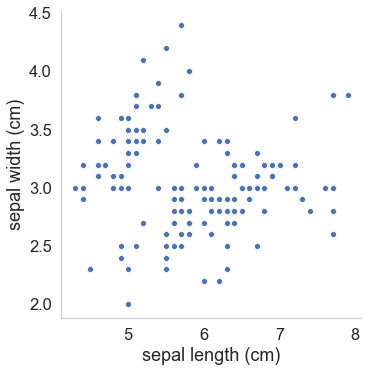

In [52]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(iris, x_vars=["sepal length (cm)"], y_vars=["sepal width (cm)"], size=5).add_legend()
plt.grid(False)

We can also add the information about the class.

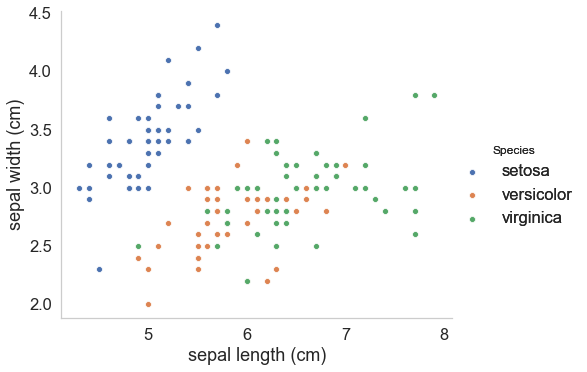

In [53]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(iris, x_vars=["sepal length (cm)"], y_vars=["sepal width (cm)"], hue="Species", size=5).add_legend();
plt.grid(False)

We can combine histograms and histograms in the same figure.

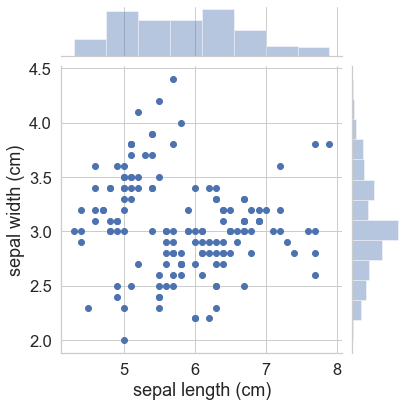

In [54]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5});
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris);
plt.grid(False);

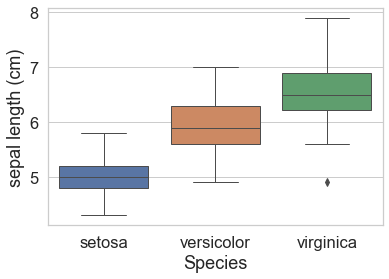

In [55]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="Species", y="sepal length (cm)", data=iris);

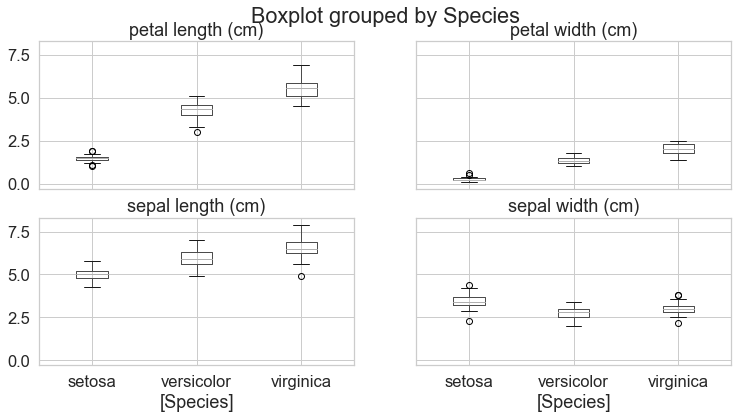

In [58]:
iris.boxplot(by="Species", figsize=(12, 6));

We can also add the scatter plot for every boxplot.

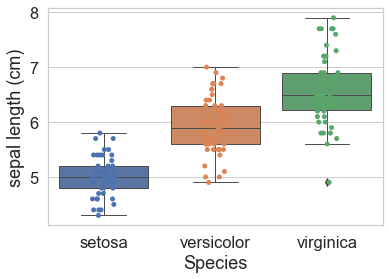

In [59]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="Species", y="sepal length (cm)", data=iris)
ax = sns.stripplot(x="Species", y="sepal length (cm)", data=iris, jitter=True, edgecolor="gray");

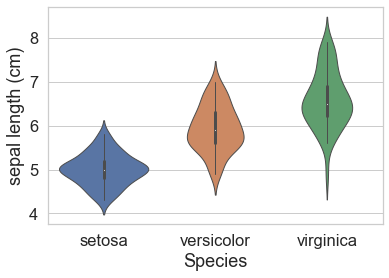

In [60]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.violinplot(x="Species", y="sepal length (cm)", data=iris);

We can plot the scatter plots for the pairwise attribute combinations.

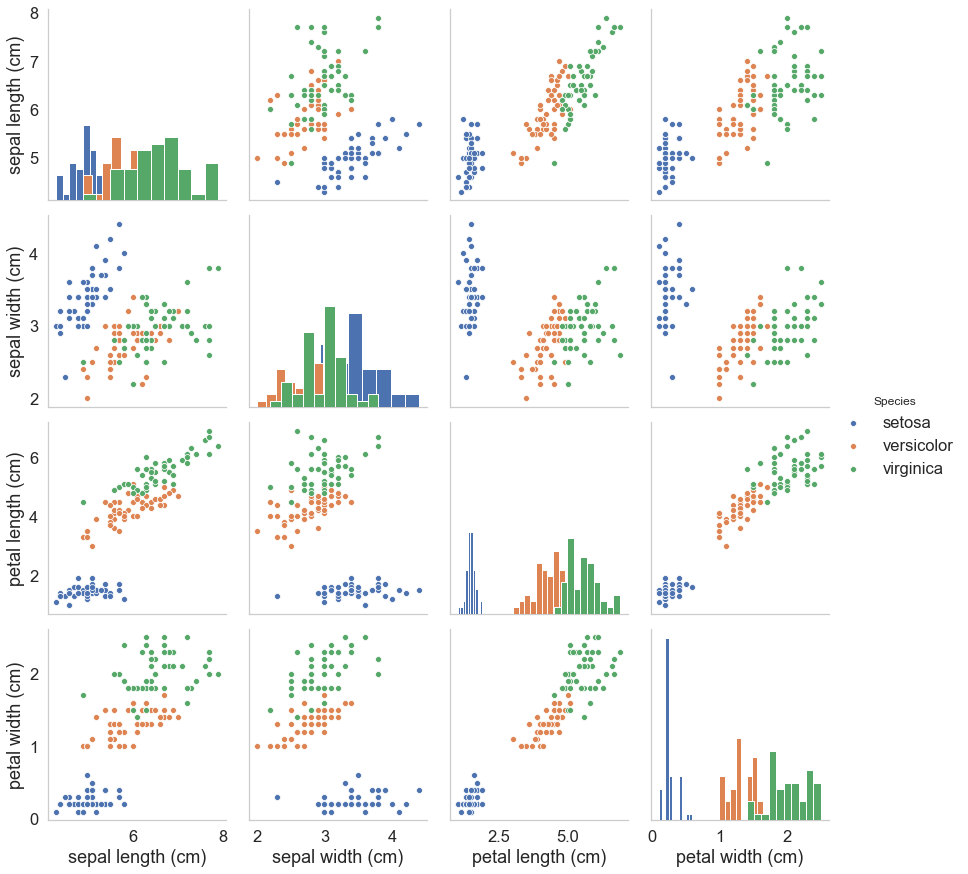

In [61]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(iris, hue="Species", size=3, diag_kind="hist");

We can replace the diagonal bar plots with a gaussian kernel density estimate.

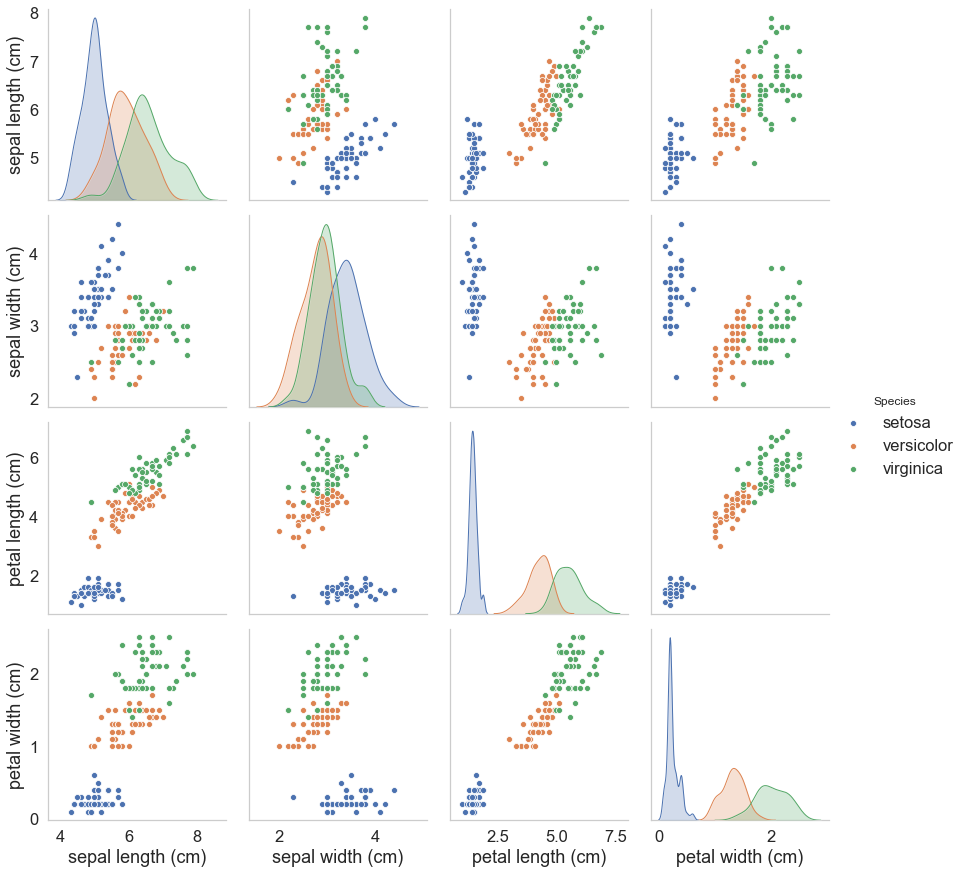

In [62]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde");

## Principal Component Analysis

So far we used only some data dimensions for visualization. We now apply Principal Component Analysis to project the four original dimensions into a two dimensional space.

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values

Principal component analysis is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [65]:
x = StandardScaler().fit_transform(x)

In [66]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_iris = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

In [67]:
pca_iris_complete = pca_iris
pca_iris_complete['Species'] = iris[['Species']]

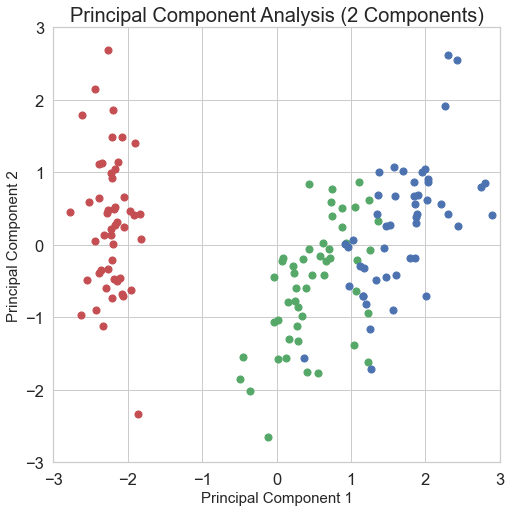

In [68]:
plt.figure(figsize = (8,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = dataset.target_names
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_iris_complete['Species'] == target
    plt.scatter(pca_iris_complete.loc[indicesToKeep, 'principal component 1']
               , pca_iris_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
# ax.legend(targets)
plt.axis([-3,3,-3,3])
plt.grid()

In [69]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.73
   Component 2 0.23
   Total Explained Variance 0.96


In [70]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.52106591 -0.26934744  0.5804131   0.56485654]
Component 1	[0.37741762 0.92329566 0.02449161 0.06694199]


In [71]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [72]:
pca_iris.head(5)

,principal component 1,principal component 2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


We can apply PCA with the same number of components as the 

In [73]:
x = iris.loc[:, numerical_variables].values
y = iris.loc[:,['Species']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

# t-SNE

In [74]:
from sklearn.manifold import TSNE

perplexity=80
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=2867976)
# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_result = tsne.fit_transform(x)

[t-SNE] Computing 149 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 1.546038
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.277550
[t-SNE] KL divergence after 300 iterations: 0.026498


In [75]:
iris_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'Species':iris['Species']})

In [76]:
iris_tsne

,x,y,Species
0,2.058382,-1.646197,setosa
1,2.165277,-1.218571,setosa
2,2.199587,-1.170278,setosa
3,2.154776,-1.232397,setosa
4,2.119528,-1.608387,setosa
...,...,...,...
145,-2.262899,0.997264,virginica
146,-1.612844,1.038232,virginica
147,-2.096023,0.878660,virginica
148,-2.190123,1.250353,virginica


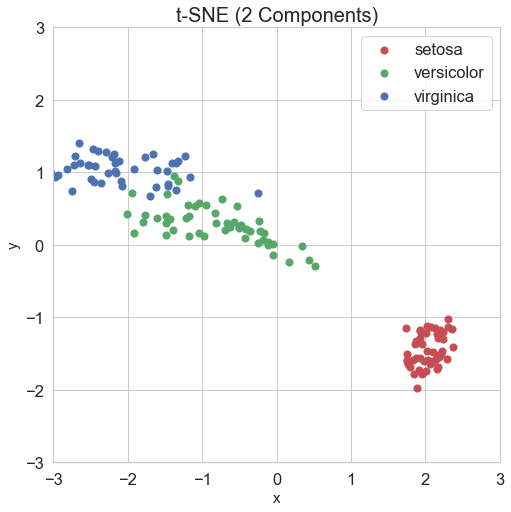

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = dataset.target_names
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_tsne['Species'] == target
    ax.scatter(iris_tsne.loc[indicesToKeep,'x'], iris_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
plt.axis([-3,3,-3,3])
ax.grid()